<a href="https://colab.research.google.com/github/sg758253/sg1205/blob/main/ADVDS/project7/FacialRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@name: sachin gupta
project: 7 FacialRecognition


In [10]:
#import library
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import KFold

#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import save_model, load_model


In [11]:
# downloading files from url
!wget 'https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project7/facesDB.zip'

--2022-03-14 14:49:04--  https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project7/facesDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1374115 (1.3M) [application/zip]
Saving to: ‘facesDB.zip.2’

facesDB.zip.2       100%[===================>]   1.31M  --.-KB/s    in 0.01s   

2022-03-14 14:49:04 (119 MB/s) - ‘facesDB.zip.2’ saved [1374115/1374115]



In [12]:
#Extracting files from zip folder
!unzip facesDB.zip

Archive:  facesDB.zip
replace facesDB/S1/1.BMP? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: facesDB/S1/1.BMP        
  inflating: facesDB/S1/10.BMP       
  inflating: facesDB/S1/2.BMP        
  inflating: facesDB/S1/3.BMP        
  inflating: facesDB/S1/4.BMP        
  inflating: facesDB/S1/5.BMP        
  inflating: facesDB/S1/6.BMP        
  inflating: facesDB/S1/7.BMP        
  inflating: facesDB/S1/8.BMP        
  inflating: facesDB/S1/9.BMP        
  inflating: facesDB/S1/Thumbs.db    
  inflating: facesDB/S10/1.BMP       
  inflating: facesDB/S10/10.BMP      
  inflating: facesDB/S10/2.BMP       
  inflating: facesDB/S10/3.BMP       
  inflating: facesDB/S10/4.BMP       
  inflating: facesDB/S10/5.BMP       
  inflating: facesDB/S10/6.BMP       
  inflating: facesDB/S10/7.BMP       
  inflating: facesDB/S10/8.BMP       
  inflating: facesDB/S10/9.BMP       
  inflating: facesDB/S10/Thumbs.db   
  inflating: facesDB/S11/1.BMP       
  inflating: facesDB/S11/10.BMP      


In [17]:
trainX = list()
trainY = list()
testX = list()
testY= list()

for i in range(1, 41):
  rands = random.sample(range(1, 11), 2) # Generates 2 random numbers for image indices
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in rands:
      testX.append(img)
      testY.append(i - 1)
    else:
      trainX.append(img)
      trainY.append(i - 1)
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

print("Train x shape: ",trainX.shape)
print("Test x shape: ",testX.shape)
print("Train y shape: ",trainY.shape)
print("Test y shape: ",testY.shape)

Train x shape:  (320, 48, 48, 3)
Test x shape:  (80, 48, 48, 3)
Train y shape:  (320,)
Test y shape:  (80,)


Task 2. Process the images as necessary and form training and testing sets. Display a few of the images to show the images were correctly read.

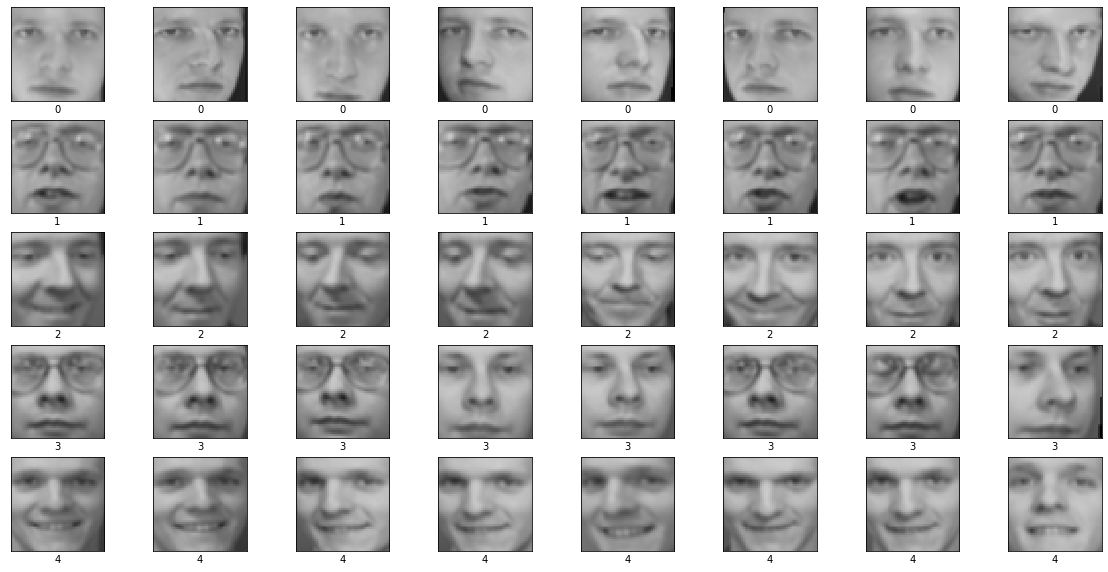

In [18]:
#Display dataset for 5 training classes
plt.figure(figsize=(20, 10))
for i in range( 40 ):
    plt.subplot( 5, 8, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(trainY[i])
plt.show()

In [19]:
# one-hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print(trainY.shape)
print(testY .shape)

(320, 40)
(80, 40)


In [20]:
trainX = trainX.astype( 'float32' )/255
testX = testX.astype( 'float32' )/255

In [21]:
#The CNN model has two main aspects: the feature extraction front end comprised of 
# convolutional and pooling layers, and the classifier backend that will make a prediction.

def create_compile_model_1():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
model1 =create_compile_model_1()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
history = model1.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY),verbose=True)

Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 3.6895 - accuracy: 0.0312 - val_loss: 3.6897 - val_accuracy: 0.0250
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 3.7017 - accuracy: 0.0281 - val_loss: 3.6887 - val_accuracy: 0.0250
Epoch 3/10
10/10 [==============================] - 10s 964ms/step - loss: 3.6918 - accuracy: 0.0250 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 3.6891 - accuracy: 0.0188 - val_loss: 3.6888 - val_accuracy: 0.0250
Epoch 5/10
10/10 [==============================] - 10s 1s/step - loss: 3.6889 - accuracy: 0.0281 - val_loss: 3.6890 - val_accuracy: 0.0250
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 3.6956 - accuracy: 0.0188 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 3.6903 - accuracy: 0.0250 - val_loss: 3.6886 - val_accuracy: 0.0250
Epoch 8/10
10/10 

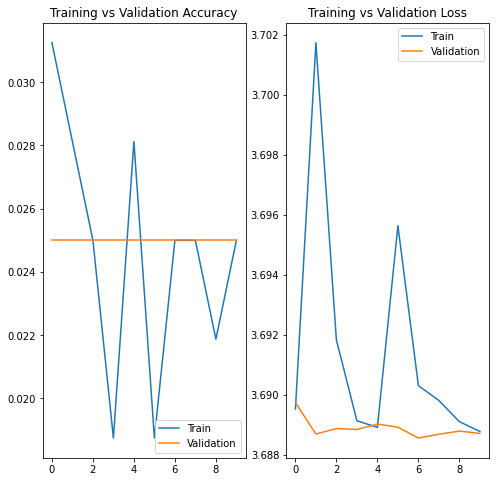

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train')
plt.plot(val_accuracy, label='Validation')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.show()

     |████████████████████████████████| 992 kB 15.1 MB/s 


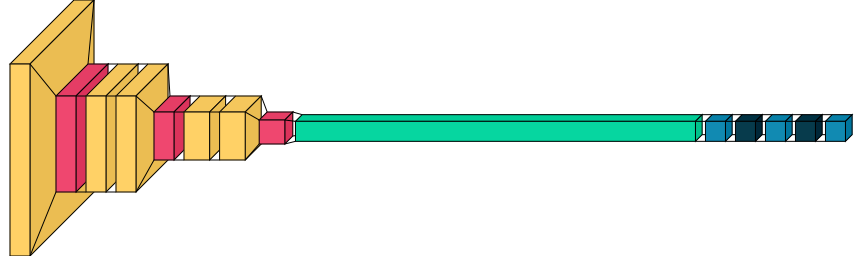

In [25]:
%pip install visualkeras
import visualkeras

# Draw model1's architecture

#visualkeras.layered_view(model1, to_file='output.png') # write to disk
#visualkeras.layered_view(model1, to_file='output.png').show() # write and show

visualkeras.layered_view(model1)

In [26]:
# Evaluate the model using k-fold cross-validation

def evaluate_model(model, dataX, dataY, n_folds):

	scores, histories = list(), list()
 
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
 
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
  
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('CV Fold accuracy:  %.3f' % (acc * 100.0))
  
		# stores scores
		scores.append(acc)
		histories.append(history)
  
	return scores, histories


In [27]:
# Plot learning curves

def summarize_learning(histories):

  for i in range(len(histories)):
		
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='red', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    plt.show()

In [28]:
# Summarize model performance

def summarize_performance(scores):

	# print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
 


In [29]:
# The main driver for evaluating the model

def process(model, num_folds):
	# evaluate the model using CV
	scores, histories = evaluate_model(model, trainX, trainY, num_folds)
 
	# learning curves
	summarize_learning(histories)
 
	# summarize estimated performance
	summarize_performance(scores)

CV Fold accuracy:  0.000
CV Fold accuracy:  0.000
CV Fold accuracy:  0.000
CV Fold accuracy:  0.000


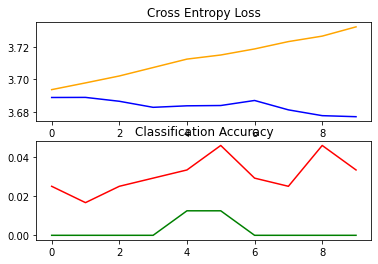

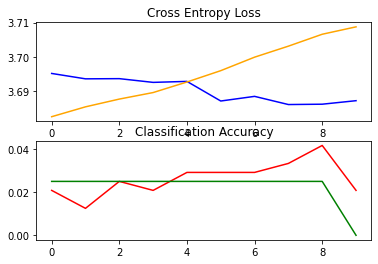

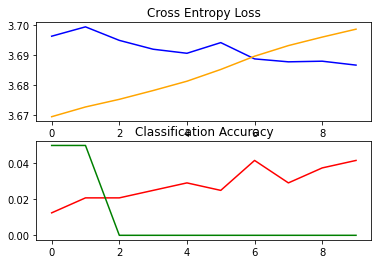

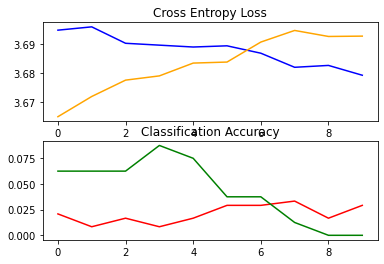

Model Accuracy: mean=0.000 std=0.000, folds=4


In [30]:
# Experiment with CNN architectures

num_folds = 4

# evaluate the model
process(model1, num_folds)

# save the model
model1.save('model1.h5')

In [31]:
#Convolution Layers

def create_compile_model_2():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [32]:
 #Dense Layer 
def create_compile_model_3():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [33]:
#Dropout rate

def create_compile_model_4():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.8),
    Dense(64, activation="relu"),
    Dropout(0.8),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [34]:
#optimizer

def create_compile_model_5():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.8),
    Dense(64, activation="relu"),
    Dropout(0.8),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [35]:
model2 =create_compile_model_2()
model3 =create_compile_model_3()
model4 =create_compile_model_4()
model5 =create_compile_model_5()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [36]:
history2 = model2.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY),verbose=0)
history3 = model3.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY),verbose=0)
history4 = model4.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY),verbose=0)
history5 = model5.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY),verbose=0)

Text(0.5, 1.0, 'Accuracy')

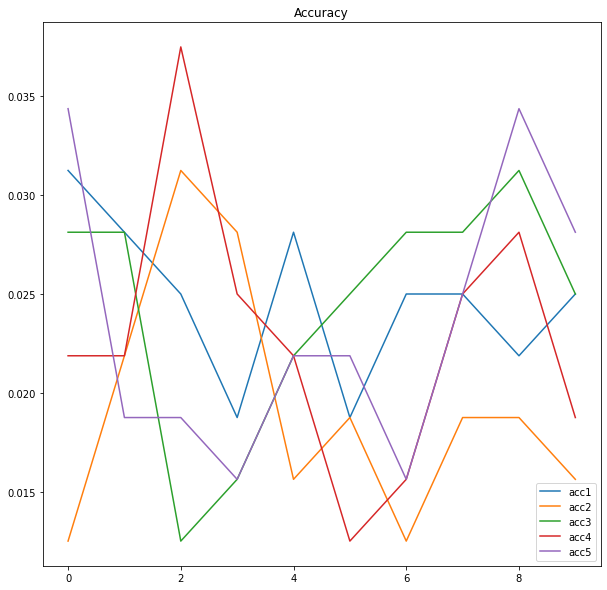

In [37]:
accuracy1 = history.history['accuracy']
accuracy2 = history2.history['accuracy']
accuracy3 = history3.history['accuracy']
accuracy4 = history4.history['accuracy']
accuracy5 = history5.history['accuracy']

plt.figure(figsize=(10, 10))
plt.plot(accuracy1, label='acc1')
plt.plot(accuracy2, label='acc2')
plt.plot(accuracy3, label='acc3')
plt.plot(accuracy4, label='acc4')
plt.plot(accuracy5, label='acc5')
plt.legend(loc='lower right')
plt.title('Accuracy')

In [38]:
summarize_performance(history.history['accuracy'])
summarize_performance(history2.history['accuracy'])
summarize_performance(history3.history['accuracy'])
summarize_performance(history4.history['accuracy'])
summarize_performance(history5.history['accuracy'])

Model Accuracy: mean=2.469 std=0.381, folds=10
Model Accuracy: mean=1.938 std=0.590, folds=10
Model Accuracy: mean=2.437 std=0.573, folds=10
Model Accuracy: mean=2.281 std=0.656, folds=10
Model Accuracy: mean=2.344 std=0.659, folds=10


In [39]:
testY=np.argmax(testY, axis=1)

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

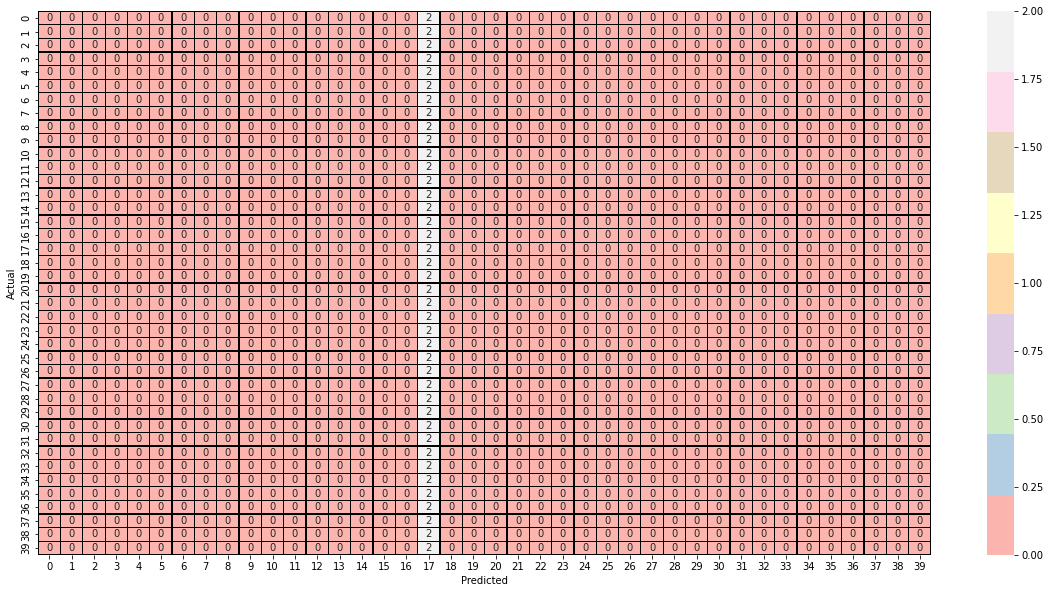

In [40]:
predY = np.argmax(model3.predict(testX), axis = 1)
cm = confusion_matrix(testY, predY)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='Pastel1', annot=True, vmax=2, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

Summary

A CNN was created for the facial recognition dataset.

Extract Images:

Images were extracted from zip folder and divided into training and test set (80%-20%) distribution. Images were normalized and target catagorized.

CNN model was created and fitted , but the accuracy of the model was low (less than 5%)

The model worked better when more dense layers were added.